In [12]:
import numpy as np
import sys
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'

sim_name = 'nref11n_nref10f'
dd_name = 'DD2175'

# get dM/dv
file_gc = 'figs/dM_dv/fits/nref11n_nref10f_DD2175_dMdv_cgm_halo_center.fits'
data_gc = Table.read(file_gc, format='fits')
dv_bins_gc = data_gc['v (km/s)']
dM_all_gc = data_gc['dM (Msun/km/s)']
dM_cold_gc = data_gc['dM_cold (Msun/km/s)']
dM_cool_gc = data_gc['dM_cool (Msun/km/s)']
dM_warm_gc = data_gc['dM_warm (Msun/km/s)']
dM_hot_gc = data_gc['dM_hot (Msun/km/s)']

# get dM/dv wrt to observer 
file_sun = 'figs/dM_dv/fits/nref11n_nref10f_DD2175_dMdv_cgm_offcenter_location.fits'
data_sun = Table.read(file_sun, format='fits')
dv_bins_sun = data_sun['v (km/s)']
dM_all_sun = data_sun['dM (Msun/km/s)']
dM_cold_sun = data_sun['dM_cold (Msun/km/s)']
dM_cool_sun = data_sun['dM_cool (Msun/km/s)']
dM_warm_sun = data_sun['dM_warm (Msun/km/s)']
dM_hot_sun = data_sun['dM_hot (Msun/km/s)']

# figure out the offset per phase 
offset_cold = dM_cold_sun - dM_cold_gc
offset_cool = dM_cool_sun - dM_cool_gc 
offset_warm = dM_warm_sun - dM_warm_gc 
offset_hot = dM_hot_sun - dM_hot_gc

In [91]:
fs=14
from foggie.utils import consistency
cmap = consistency.temperature_discrete_cmap
c_all = plt.cm.Greys(0.7)
c_cold = cmap(0.05)
c_cool = cmap(0.25)
c_warm = cmap(0.6)
c_hot = cmap(0.9)

sun_ls = '-'
sun_lw = 3

gc_ls = '--'
gc_lw = 2

vmin = -400
vmax = 400

fs = 14 

ymin1 = 2e3
ymax1 = 8e8

ymin2 = -8e8 
ymax2 = 8e8 

In [123]:
'''
vel = dv_bins_sun 
sun_flux = dM_cold_sun 
gc_flux = dM_cold_gc 
color = c_cold 
offset_flux = offset_cold
tag = 'cold'
'''

'''
vel = dv_bins_sun 
sun_flux = dM_cool_sun 
gc_flux = dM_cool_gc 
color = c_cool 
offset_flux = offset_cool
tag = 'cool'
'''

vel = dv_bins_sun 
sun_flux = dM_warm_sun 
gc_flux = dM_warm_gc 
color = c_warm 
offset_flux = offset_warm
tag = 'warm'

'''
vel = dv_bins_sun 
sun_flux = dM_hot_sun 
gc_flux = dM_hot_gc 
color = c_hot
offset_flux = offset_hot
tag = 'hot'
'''

"\nvel = dv_bins_sun \nsun_flux = dM_hot_sun \ngc_flux = dM_hot_gc \ncolor = c_hot\noffset_flux = offset_hot\ntag = 'hot'\n"

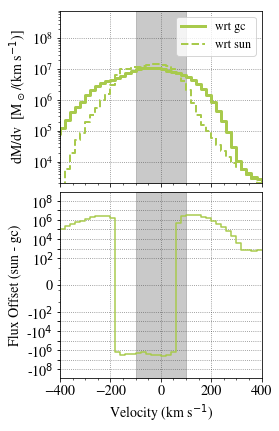

In [124]:
fig = plt.figure(figsize=(4, 6))
ax1 = fig.add_axes([0.2, 0.57, 0.7, 0.4])
ax2 = fig.add_axes([0.2, 0.12, 0.7, 0.43])

ax1.step(vel, sun_flux, color=color, linestyle=sun_ls, linewidth=sun_lw, label='wrt gc')
ax1.step(vel, gc_flux, color=color, linestyle=gc_ls, linewidth=gc_lw, label='wrt sun')
ax1.set_yscale('log')
ax1.set_xlim(vmin, vmax)
ax1.set_xticklabels([])
ax1.set_ylim(ymin1, ymax1)
ax1.minorticks_on()
ax1.set_ylabel(r'dM/dv  [M$_\odot$/(km s$^{-1}$)]', fontsize=fs)
ax1.legend(fontsize=fs-2)
ax1.fill_between([-100, 100], ymin1, ymax1, color=plt.cm.Greys(0.6), alpha=0.4)

ax2.step(vel, offset_flux, color=color)
# ax2.set_ylim(ymin, ymax)
ax2.set_yscale('symlog')
ax2.set_yticks([-1e8, -1e7, -1e6, -1e5, -1e4, -1e3, -1e2, 
                0, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
ax2.set_yticklabels([r'-10$^8$', '', r'-10$^6$', '', r'-10$^4$', '', r'-10$^2$', 0, 
                     r'10$^2$', '', r'10$^4$', '', r'10$^6$', '',  r'10$^8$'])
ax2.set_ylim(ymin2, ymax2)
ax2.set_xlabel(r'Velocity (km s$^{-1}$)', fontsize=fs)
ax2.set_ylabel(r'Flux Offset (sun - gc)', fontsize=fs)
ax2.fill_between([-100, 100], ymin2, ymax2, color=plt.cm.Greys(0.6), alpha=0.4)

for ax in [ax1, ax2]: 
    ax.minorticks_on()
    ax.set_xlim(vmin, vmax)
    ax.grid(linestyle=':', alpha=0.7, color=plt.cm.Greys(0.8))
    for tick in ax.xaxis.get_major_ticks(): 
        tick.label.set_fontsize(fs)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs)
        
fig.savefig('figs/dM_dv/nref11n_nref10f_DD2175_dMdv_cgm_offset_%s.pdf'%(tag))